In [37]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt

In [38]:
recon = np.load('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Temp_Data/recon_sample.npy')
origin = np.load('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Temp_Data/original_sample.npy')

In [39]:
print(recon.shape)

(3, 30, 128)


In [40]:
print(origin.shape)

(3, 30, 128)


In [118]:
print(np.max(origin))
print(np.max(recon))
print(np.min(origin))
print(np.min(recon))

0.34511034398934765
0.4491813922297698
0.20374073619705702
0.213660838191519


In [116]:
#try unscaling the data
Max_Scalar = np.load('/fast/gmooers/Preprocessed_Data/W_Trial/Space_Time_Max_Scalar.npy')
Min_Scalar = np.load('/fast/gmooers/Preprocessed_Data/W_Trial/Space_Time_Min_Scalar.npy')

In [117]:
print(Max_Scalar)
print(Min_Scalar)

24.763672
-8.849842


In [119]:
Unscaled_Predict_Images = np.interp(recon, (0, 1), (Min_Scalar, Max_Scalar))
Unscaled_Test_Images = np.interp(origin, (0, 1), (Min_Scalar, Max_Scalar))

In [138]:
print(Unscaled_Test_Images.shape)

(3, 30, 128)


In [120]:
print(np.max(Unscaled_Test_Images))
print(np.max((Unscaled_Predict_Images)))
print(np.min(Unscaled_Test_Images))
print(np.min(Unscaled_Predict_Images))

2.7505292892456055
6.248722920705365
-2.0013999938964853
-1.6679505071546057


In [123]:
maxs = np.zeros(shape=(2))
maxs[0] = np.max(origin)
maxs[1] = np.max(recon)
max_val = np.max(maxs)

mins = np.zeros(shape=(2))
mins[0] = np.min(origin)
mins[1] = np.min(recon)
min_val = np.min(mins)

In [125]:
maxs = np.zeros(shape=(2))
maxs[0] = np.max(Unscaled_Test_Images)
maxs[1] = np.max(Unscaled_Predict_Images)
max_val = np.max(maxs)

mins = np.zeros(shape=(2))
mins[0] = np.min(Unscaled_Test_Images)
mins[1] = np.min(Unscaled_Predict_Images)
min_val = np.min(mins)

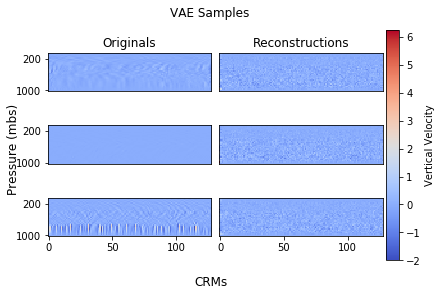

In [157]:
samples = 3
fig, axs = plt.subplots(samples, 2)
count_a = 0
count_b = 0
count_c = 0
#axs[0, 0].invert_yaxis()
for i in range(samples*2): 
    if i % 2 == 0:
        #axs[int(i/2), 0].imshow(origin[int(i/2)], vmax = max_val, vmin = min_val, cmap='coolwarm')
        cb = axs[int(i/2), 0].imshow(Unscaled_Test_Images[int(i/2)], vmax = max_val, vmin = min_val, cmap='coolwarm')
        axs[int(i/2), 0].invert_yaxis()
        y_ticks = np.arange(1800, 0, -800)
        axs[int(i/2), 0].set_yticklabels(y_ticks)
        if count_b == 0:
            axs[int(i/2), 0].set_title("Originals")
            count_b = 1
        if i == 0:
            cbaxes = fig.add_axes([0.908, 0.1, 0.03, 0.8])
            fig.colorbar(cb, cax = cbaxes, label = "Vertical Velocity")
            
            
    elif i % 2 == 1:
        #axs[int(i/2), 1].imshow(recon[int(i/2)], vmax = max_val, vmin = min_val, cmap='coolwarm')
        axs[int(i/2), 1].imshow(Unscaled_Predict_Images[int(i/2)], vmax = max_val, vmin = min_val, cmap='coolwarm')
        axs[int(i/2), 1].set_yticks([])
        axs[int(i/2), 1].invert_yaxis()
        if count_c == 0:
            axs[int(i/2), 1].set_title("Reconstructions")
            count_c = 1
    
    if i < samples*2-3:
        axs[int(i/2), 1].set_xticks([])
        axs[int(i/2), 0].set_xticks([])
        if count_a == 0:
            label = axs[int(i/2), 1].set_xlabel('CRMs', fontsize = 12)
            axs[int(i/2), 1].xaxis.set_label_coords(-0.05, -4.825)
            label = axs[int(i/2), 1].set_ylabel('Pressure (mbs)', fontsize = 12)
            axs[int(i/2), 1].yaxis.set_label_coords(-1.22, -1.525)
            count_a = 1
 
    
    
    
#plt.xlabel("CRMs")
#plt.ylabel("Elevation")
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.suptitle("VAE Comparison")
plt.show()
plt.close()
print(' ')

In [158]:
max_val = np.max(Unscaled_Predict_Images)
min_val = np.min(Unscaled_Predict_Images)

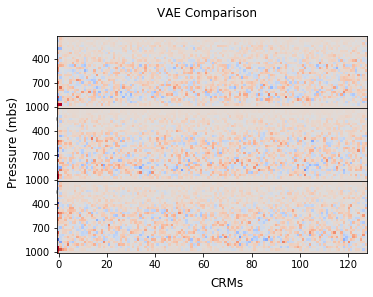

In [181]:
fig, axs = plt.subplots(samples)
for i in range(samples):
    axs[i].imshow(Unscaled_Predict_Images[i], vmax = 1.5, vmin = min_val, cmap='coolwarm')
    axs[i].set_yticklabels(y_ticks)
    axs[i].invert_yaxis()
    if i == samples-1:
        label = axs[i].set_xlabel('CRMs', fontsize = 12)
        axs[i].xaxis.set_label_coords(0.55, -0.325)
        label = axs[i].set_ylabel('Pressure (mbs)', fontsize = 12)
        axs[i].yaxis.set_label_coords(-0.12, 1.525)
    y_ticks = np.arange(1300, 100, -300)
        
    
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.suptitle("VAE Comparison")
plt.show()
plt.close()

Make code for distriubtion figures

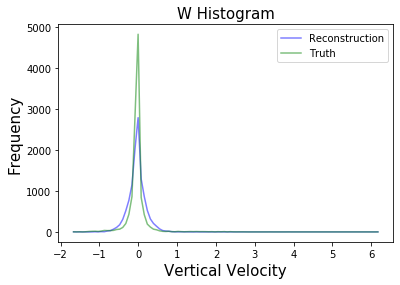

In [148]:
colors = ['g','r','b']
test = Unscaled_Test_Images.ravel()
reconstruction = Unscaled_Predict_Images.ravel()
shared_bins = np.histogram_bin_edges(reconstruction, bins=100)
freq, edges = np.histogram(reconstruction, bins = shared_bins)
freq_targ, edges_targ = np.histogram(test, bins = shared_bins)
fig, ax = plt.subplots()
    
plt.plot(edges[:-1], freq,  label = "Reconstruction", alpha = 0.5, color = 'blue')
plt.plot(edges_targ[:-1], freq_targ, label = "Truth", alpha = 0.5, color = 'green')

plt.xlabel('Vertical Velocity', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('W Histogram', fontsize = 15)
plt.legend(loc = 'best')
plt.show()
plt.close()
print(' ')